=== Preview ===
  ticket_id user_id region priority channel          created_at  \
0      T001    U001     UK     High    Chat 2024-07-01 08:15:00   
1      T002    U002     EU   Medium   Email 2024-07-01 10:00:00   
2      T003    U003     UK      Low    Chat 2024-07-01 11:00:00   
3      T004    U004     US     High   Phone 2024-07-01 12:10:00   
4      T005    U005     EU   Medium    Chat 2024-07-01 09:30:00   

    first_response_at         resolved_at  sla_hours  response_time  \
0 2024-07-01 09:00:00 2024-07-01 12:30:00          4           0.75   
1 2024-07-01 13:30:00 2024-07-02 09:15:00          8           3.50   
2 2024-07-01 14:00:00 2024-07-02 15:00:00         12           3.00   
3 2024-07-01 12:25:00 2024-07-01 15:00:00          4           0.25   
4 2024-07-01 11:00:00 2024-07-01 18:30:00          8           1.50   

   resolution_time  sla_breached  
0         4.250000          True  
1        23.250000          True  
2        28.000000          True  
3         2.83

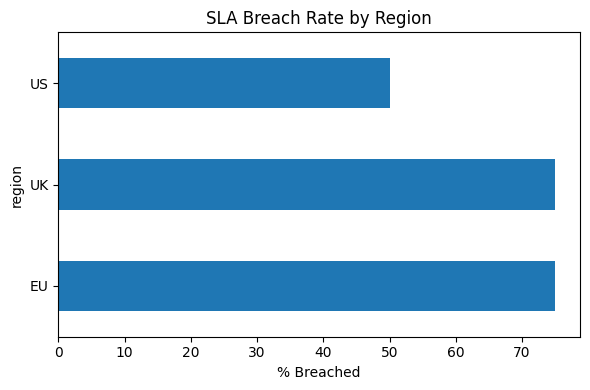

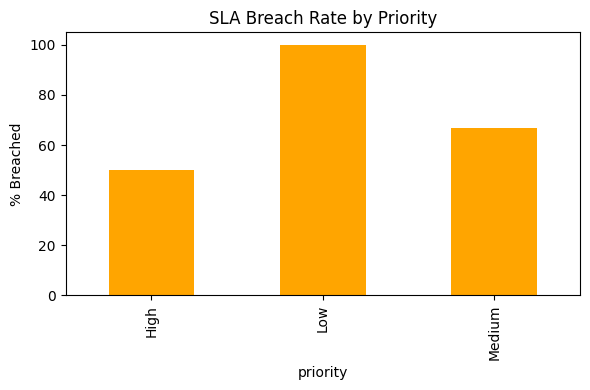

Overall SLA Breach Rate: 70.0%


In [4]:
# Support Operations Simulator
# Author: Anuoluwapo Oke
# Goal: Analyse support tickets and reduce SLA breaches

import pandas as pd
import matplotlib.pyplot as plt

# --- Load data from GitHub ---
url = 'https://raw.githubusercontent.com/Anuoluwapooke/revolut-ready-portfolio/refs/heads/main/01-support-ops-simulator/data/tickets.csv'
df = pd.read_csv(url, parse_dates=['created_at','first_response_at','resolved_at'])

# --- Calculate metrics ---
df['response_time'] = (df['first_response_at'] - df['created_at']).dt.total_seconds()/3600
df['resolution_time'] = (df['resolved_at'] - df['created_at']).dt.total_seconds()/3600
df['sla_breached'] = df['resolution_time'] > df['sla_hours']

print("=== Preview ===")
print(df.head())

# --- Breach rate by region ---
breach_region = df.groupby('region')['sla_breached'].mean()*100
breach_region.plot(kind='barh', figsize=(6,4), title='SLA Breach Rate by Region')
plt.xlabel('% Breached'); plt.tight_layout(); plt.show()

# --- Breach rate by priority ---
breach_priority = df.groupby('priority')['sla_breached'].mean()*100
breach_priority.plot(kind='bar', color='orange', figsize=(6,4), title='SLA Breach Rate by Priority')
plt.ylabel('% Breached'); plt.tight_layout(); plt.show()

overall = df['sla_breached'].mean()*100
print(f"Overall SLA Breach Rate: {overall:.1f}%")
